# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [19]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [44]:
import pickle
import gzip
import sys

def load_mnist_local(path):
    if path.endswith(".gz"):
        f = gzip.open(path, 'rb')
    else:
        f = open(path, 'rb')

    if sys.version_info < (3,):
        data = pickle.load(f)
    else:
        data = pickle.load(f, encoding="bytes")

    f.close()
    return data

path_to_dataset = "data/mnist.pkl.gz"
(X_train, y_train), (X_test, y_test) = load_mnist_local(path_to_dataset)

In [45]:
X_test_orig = X_test

## Data Preparation

In [46]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [47]:
# Seed for reproducibilty
np.random.seed(1338)

# Test data
X_test = X_test.copy()
Y = y_test.copy()

# Converting the output to binary classification(Six=1,Not Six=0)
Y_test = Y == 6
Y_test = Y_test.astype(int)

# Selecting the 5918 examples where the output is 6
X_six = X_train[y_train == 6].copy()
Y_six = y_train[y_train == 6].copy()

# Selecting the examples where the output is not 6
X_not_six = X_train[y_train != 6].copy()
Y_not_six = y_train[y_train != 6].copy()

# Selecting 6000 random examples from the data that 
# only contains the data where the output is not 6
random_rows = np.random.randint(0,X_six.shape[0],6000)
X_not_six = X_not_six[random_rows]
Y_not_six = Y_not_six[random_rows]

In [48]:
# Appending the data with output as 6 and data with output as <> 6
X_train = np.append(X_six,X_not_six)

# Reshaping the appended data to appropraite form
X_train = X_train.reshape(X_six.shape[0] + X_not_six.shape[0], 
                          1, img_rows, img_cols)

# Appending the labels and converting the labels to 
# binary classification(Six=1,Not Six=0)
Y_labels = np.append(Y_six,Y_not_six)
Y_train = Y_labels == 6 
Y_train = Y_train.astype(int)

In [49]:
print(X_train.shape, Y_labels.shape, X_test.shape, Y_test.shape)

(11918, 1, 28, 28) (11918,) (10000, 1, 28, 28) (10000,)


In [50]:
# Converting the classes to its binary categorical form
nb_classes = 2
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

# A simple CNN

### Step 1: Model Definition

### Step 2: Compile

### Step 3: Fit

Train on 10130 samples, validate on 1788 samples
Epoch 1/2
10130/10130 [==============================] - 8s - loss: 0.3437 - acc: 0.9040 - val_loss: 0.2393 - val_acc: 0.9374

### Step 4: Evaluate

Test score: 0.181571543872
Test accuracy: 0.9428


### Let's plot our model Predictions!

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline

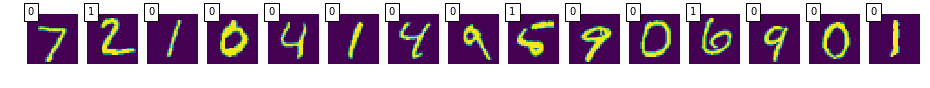

# Adding more Dense Layers

# Adding Dropout

# Adding more Convolution Layers

# Fun time! :-)
Let's play with the CNN above in your browser with `keras.js`. Open this [link](https://transcranial.github.io/keras-js/#/mnist-cnn) in your browser!

# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [71]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), data_format="channels_first",                       
                        input_shape=(1, img_rows, img_cols)))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1, validation_split=0.15)
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [72]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 10130 samples, validate on 1788 samples
Epoch 1/2
10130/10130 [==============================] - 20s - loss: 0.5355 - acc: 0.7592 - val_loss: 0.4214 - val_acc: 0.8691

# Batch Normalisation

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## How to BatchNorm in Keras

```python
from keras.layers.normalization import BatchNormalization

BatchNormalization(epsilon=1e-06, mode=0, 
                   axis=-1, momentum=0.99, 
                   weights=None, beta_init='zero', 
                   gamma_init='one')
```

In [33]:
# Try to add a new BatchNormalization layer to the Model 
# (after the Dropout layer)


In [48]:
from keras import optimizers
dir(optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'K',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'clip_norm',
 'get',
 'get_from_module',
 'nadam',
 'optimizer_from_config',
 'rmsprop',
 'sgd',
 'zip']

`optimizer` is one of the required arguments of `model.compile` and allows to control the optimization process.
You can set the optimizer by:
- calling it by its __name__; this way the optimizer is initialzed to its __default__ values
- create a __custom__ optmizer

In [49]:
# for example, here we compile the model with adagrad set to its default values
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_split=0.15)

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 28s - loss: 0.1436 - acc: 0.9799 - val_loss: 0.0441 - val_acc: 0.9859
Epoch 2/2
11918/11918 [==============================] - 32s - loss: 0.0280 - acc: 0.9900 - val_loss: 0.1469 - val_acc: 0.9528


In [51]:
from keras.optimizers import Adagrad
# here we use a custom optimizerinstead
opt = Adagrad(lr=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_split=0.15)

Train on 11918 samples, validate on 10000 samples
Epoch 1/2
11918/11918 [==============================] - 30s - loss: 0.0943 - acc: 0.9854 - val_loss: 0.0278 - val_acc: 0.9930
Epoch 2/2
11918/11918 [==============================] - 30s - loss: 0.0244 - acc: 0.9930 - val_loss: 0.0208 - val_acc: 0.9956


In [ ]:
# Now it is your turn! Try with other optimizers